In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # plot 

In [4]:
df = pd.read_csv('data.csv')
df

,Brand,Type,Color,Construction Year,Odometer,Ask Price,Days Until MOT,HP
0,Peugeot 106,1.0,blue,2002,166879,999,138,60
1,Peugeot 106,1.0,blue,1998,234484,999,346,60
2,Peugeot 106,1.1,black,1997,219752,500,-5,60
3,Peugeot 106,1.1,red,2001,223692,750,-87,60
4,Peugeot 106,1.1,grey,2002,120275,1650,356,59
5,Peugeot 106,1.1,red,2003,131358,1399,266,60
6,Peugeot 106,1.1,green,1999,304277,799,173,57
7,Peugeot 106,1.4,green,1998,93685,1300,0,75
8,Peugeot 106,1.1,white,2002,225935,950,113,60
9,Peugeot 106,1.4,green,1997,252319,650,133,75


In [7]:
# clear number
# one hot in coding for color
df_colors = df['Color'].str.get_dummies().add_prefix('Color: ')
# one hot in coding for type
df_type = df['Type'].apply(str).str.get_dummies().add_prefix('Type: ')
# add one hot coding int to array
df = pd.concat([df, df_colors, df_type], axis = 1)
# clear the original column of the one hot array
df = df.drop(['Brand', 'Type', 'Color'], axis = 1)

df

,Construction Year,Odometer,Ask Price,Days Until MOT,HP,Color: black,Color: blue,Color: green,Color: grey,Color: red,Color: white,Type: 1.0,Type: 1.1,Type: 1.4
0,2002,166879,999,138,60,0,1,0,0,0,0,1,0,0
1,1998,234484,999,346,60,0,1,0,0,0,0,1,0,0
2,1997,219752,500,-5,60,1,0,0,0,0,0,0,1,0
3,2001,223692,750,-87,60,0,0,0,0,1,0,0,1,0
4,2002,120275,1650,356,59,0,0,0,1,0,0,0,1,0
5,2003,131358,1399,266,60,0,0,0,0,1,0,0,1,0
6,1999,304277,799,173,57,0,0,1,0,0,0,0,1,0
7,1998,93685,1300,0,75,0,0,1,0,0,0,0,0,1
8,2002,225935,950,113,60,0,0,0,0,0,1,0,1,0
9,1997,252319,650,133,75,0,0,1,0,0,0,0,0,1


Text(0.5, 1.0, 'Car Price Variables')

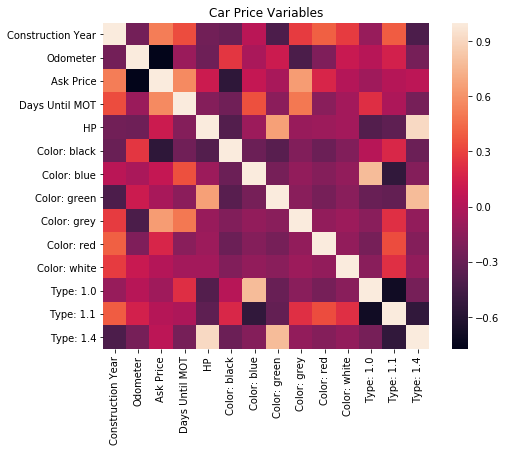

In [9]:
# turn the normalized operation
"""
analysis the correlation of the data

"""
matrix = df.corr()
f, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(matrix, square = True)
plt.title('Car Price Variables')

In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [13]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [20]:
X = df[['Construction Year', 'Days Until MOT', 'Odometer']] # select three symbols
y = df['Ask Price'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2003) # 30% of number design to the test number

X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test= y_normalizer.transform(y_test)

# train the model
knn = KNeighborsRegressor(n_neighbors = 2)
knn.fit(X_train, y_train.ravel())


D:\anaconda\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\anaconda\anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConver

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [23]:
#use the model to predict the prices:
y_pred = knn.predict(X_test)
y_pred_inv = y_normalizer.inverse_transform(y_pred) # return the y which has been normalized to the original number
y_test_inv = y_normalizer.inverse_transform(y_test) # same as before

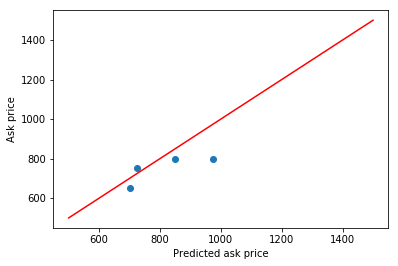

[725.  700.  849.5 974.5]


In [26]:
# Bulid the plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Add the prefect prediction line
diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, "-r")
plt.xlabel('Predicted ask price')
plt.ylabel('Ask price')
plt.show()

print(y_pred_inv)

In [27]:
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [29]:
pred = knn.predict(X_test)

In [30]:
pred # the result of the prediction

array([-0.84925947, -0.92077271, -0.49312353, -0.13555732])

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
mean_absolute_error(y_pred_inv, y_test_inv)

75.25

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred_inv, y_test_inv)

9118.875

In [34]:
y_pred_inv

array([725. , 700. , 849.5, 974.5])

In [35]:
y_test_inv

array([[750.],
       [650.],
       [799.],
       [799.]])